<a href="https://colab.research.google.com/github/HastiSoudbakhsh/Netflix-Analysis/blob/main/Netflix_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
import plotly.graph_objs as go
import plotly.express as px
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import chi2_contingency
from scipy.stats import chi2
import scipy.stats as stats
from numpy import median
from numpy import std

from scipy import stats

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
upload = files.upload()

Saving Netflix dataset.csv to Netflix dataset.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(upload['Netflix dataset.csv']))
data=df
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
data.keys()

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [ ]:
data.shape

(8790, 10)

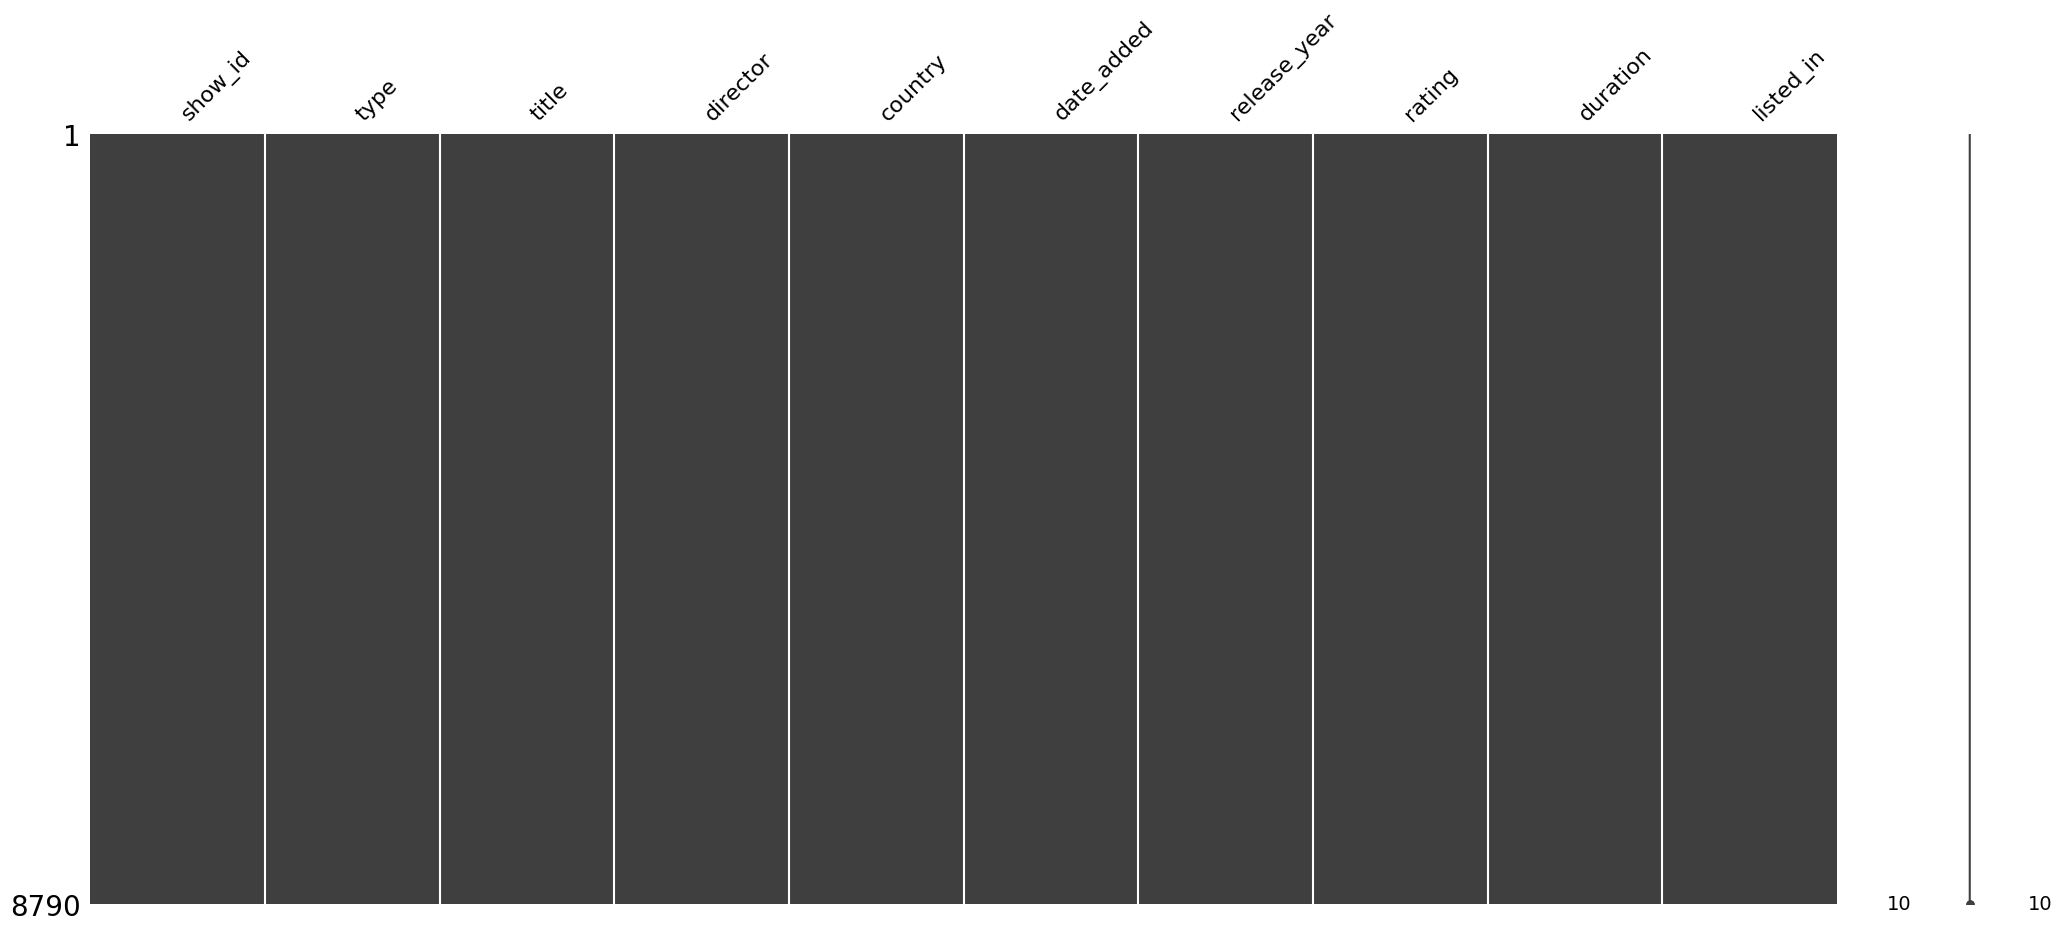

In [ ]:
# Visualize the general missing values of data
msno.matrix(data)
plt.show()

In [ ]:
missingvalues = data.isnull().sum()
missingvalues

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None


In [ ]:
data.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


<ipython-input-11-ed97428ca3f0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

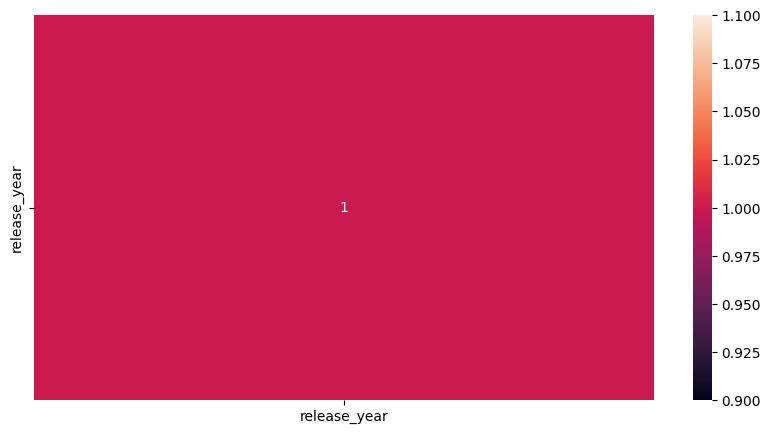

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

In [ ]:
df = data[['type','title','country','rating']]

fig = px.box(df.melt(), y="value", facet_col="variable",facet_col_wrap=2, boxmode="overlay", color="variable",height=1000, width=900)
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(showlegend=False)
fig.update_xaxes(showline=True, linewidth=2, linecolor='grey')
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')

fig.show()

In [ ]:
pip install pandas-profiling
pandas_profiling.ProfileReport(df, **kwargs)
from pandas_profiling import ProfileReport
ProfileReport(data)

SyntaxError: ignored

In [ ]:
import seaborn as sns

In [ ]:
df = data[['rating','duration']]
fig = px.histogram(df, x="rating",y="duration",  histfunc='avg')
fig.show()

In [ ]:
reg = LinearRegression()
fig = go.Figure(data=go.Scatter(name='observations',x=data['duration'], y=data['type'],mode='markers'))

fig.update_traces(hovertemplate='Spending: %{x} <br>Income: %{y}')
fig.show()

In [ ]:
df_count = data['show_id'].count().sum()
print(df_count)
# Split of showes and TV
df_type = data.groupby('type')['show_id'].count().reset_index()
df_type = df_type.rename(columns = {"show_id":"count_showids"})

8790


In [ ]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Indicator(
    value = df_count))

fig = fig.update_layout(
        template = {'data' : {'indicator': [{
        'title': {'text': "Total content on Netflix"},}]
        }})

###fig = fig.update_layout(
    #autosize=False,
    #width=500,
    ###height=100,
   ### margin=dict(l=50,r=50,b=0,t=1),)

fig2 = px.pie(df_type, values='count_showids', names='type', color_discrete_sequence=px.colors.sequential.RdBu,
        title='What type of titles are uploaded more on Netflix' , width=500, height=450)

###fig.show()
fig2.show()

In [ ]:
# splitting the countries in different rows
#df_genre = df[df['title'].isin(['Blood & Water', 'Dick Johnson Is Dead', 'Ganglands' ])]
df_country = data[['show_id', 'title','type', 'country' ]]
df_country = (df_country.drop('country', axis=1)
             .join
             (
             df_country.country
             .str
             .split(', ',expand=True)
             .stack()
             .reset_index(drop=True, level=1)
             .rename('country')
             ))

In [ ]:
df_country_viz_total = df_country[["title", "country"]]
df_country_viz_total = df_country_viz_total.groupby(['country'])["title"].count().reset_index().sort_values('title', ascending= False).head(10)
df_country_viz_total = df_country_viz_total.rename(columns = {"title": "movies_count",})


fig1 = px.bar(df_country_viz_total, x='country', y='movies_count', color_discrete_sequence=px.colors.sequential.RdBu,
       title='Top 10 countries with Netflix Content ')


df_country_viz = df_country[["title", "country"]]
df_country_viz = df_country_viz.groupby(['country'])["title"].count().reset_index().sort_values('title', ascending= False).head(10)

df_country_viz1 = df_country[["title", "type", "country"]]
df_country_viz1 = df_country_viz1.groupby(['country', 'type'])["title"].count().reset_index().sort_values('title', ascending= False)
df_country_viz1 = df_country_viz1.rename(columns = {"title": "movies_count",})

final1 = df_country_viz.merge(df_country_viz1, how = 'left', left_on = 'country', right_on = 'country')
final1['percentage'] = (final1['movies_count']/final1['title'])*100
final1['percentage'] = final1['percentage'].round(1)
final1['percent_string'] = final1['percentage'].astype(str)+ '%'

fig2 = px.bar(final1, x='country', y='percentage', color = 'type',
       title='Top 10 countries with Movie/TV show split ')

In [ ]:
fig = go.Figure()
fig.add_trace(

go.Bar(x= df_country_viz_total['country'], y= df_country_viz_total['movies_count'], marker_color = 'Maroon',
           text = df_country_viz_total['movies_count'], textposition='auto'))

fig.update_layout(title_text = "Top 10 countries with Netflix Content"
                  , yaxis=dict(title='Movies/TV Shows Count'))
fig.show()

final_movie = final1.query("type == 'Movie'")
final_show = final1.query("type == 'TV Show'")

fig = go.Figure()
fig.add_trace(go.Bar(
    x=  final_movie['country'],
    y= final_movie['percentage'],
    showlegend=True,
    text = final_movie['percent_string'],
    textposition='auto',
    name='Movie',
    marker_color='Maroon'

))
fig.add_trace(go.Bar(
    x= final_show['country'],
    y= final_show['percentage'],
    showlegend=True,
    text = final_show['percent_string'],
    textposition='auto',
    name='TV Show',
    marker_color='Grey'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='stack', title_text = 'Top 10 countries with Movie/TV show split '
                  , yaxis=dict(title='% Movies/TV Shows Count'))
fig.show()

In [ ]:
df_2 = data.query("type == 'Movie'")


df_2['rating'] = df_2['rating'].replace({
'PG-13': 'Teens - Age above 12',
'TV-MA': 'Adults',
'PG': 'Kids - with parental guidence',
'TV-14': 'Teens - Age above 14',
'TV-PG': 'Kids - with parental guidence',
'TV-Y': 'Kids',
'TV-Y7': 'Kids - Age above 7',
'R': 'Adults',
'TV-G': 'Kids',
'G': 'Kids',
'NC-17': 'Adults',
'NR': 'NR',
'UR' : 'UR'
})

df_2 = df_2[["title", "rating"]]
df_2 = df_2.groupby(['rating'])["title"].count().reset_index().sort_values('title', ascending = False)
df_2 = df_2.rename(columns = {"title": "movies_count"})
px.bar(df_2, x='rating', y='movies_count', color_discrete_sequence=px.colors.sequential.RdBu,
       title='For which category the maximum content(Movies) are uploaded? ')

<ipython-input-9-6fe2330f7bd6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['rating'] = df_2['rating'].replace({


In [ ]:
df_3 = data.query("type == 'TV Show'")


df_3['rating'] = df_3['rating'].replace({
'PG-13': 'Teens - Age above 12',
'TV-MA': 'Adults',
'PG': 'Kids - with parental guidence',
'TV-14': 'Teens - Age above 14',
'TV-PG': 'Kids - with parental guidence',
'TV-Y': 'Kids',
'TV-Y7': 'Kids - Age above 7',
'R': 'Adults',
'TV-G': 'Kids',
'G': 'Kids',
'NC-17': 'Adults',
'NR': 'NR',
'UR' : 'UR'
})


df_3 = df_3[["title", "rating"]]
df_3 = df_3.groupby('rating')["title"].count().reset_index().sort_values('title', ascending = False)
df_3 = df_3.rename(columns = {"title": "movies_count"})
px.bar(df_3, x='rating', y='movies_count', color_discrete_sequence=['blue'],
       title='For which category the maximum content(TV Shows) are uploaded?')

<ipython-input-11-2c0af42135c6>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df_5 = data.query("release_year >= 2007")
df_5 = df_5.groupby("release_year")["show_id"].count().reset_index()

fig = px.area(df_5, x='release_year', y='show_id', color_discrete_sequence=px.colors.sequential.RdBu,
      title='Overall content release Trend')
fig.show()

In [ ]:
df_4 = data.query("release_year >= 2007")
df_4 = df_4.groupby(["type","release_year"])["show_id"].count().reset_index()
df_4_movie = df_4.query("type == 'Movie'")
df_4_show = df_4.query("type == 'TV Show'")

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=  df_4_movie['release_year'],
    y= df_4_movie['show_id'],
    showlegend=True,
    text = df_4_movie['show_id'],

    name='Movie',
    marker_color='Maroon'

))
fig.add_trace(go.Scatter(
    x=  df_4_show['release_year'],
    y= df_4_show['show_id'],
    showlegend=True,
    text = df_4_show['show_id'],

    name='TV Show',
    marker_color='Grey'
))

fig.update_traces( mode='lines+markers')
fig.update_layout(title_text = 'Movies/TV Show release yearly Trend' )
fig.show()

In [ ]:
from plotly.tools import make_subplots
df_genre_viz = data[["title", "type", "listed_in"]]
df_genre_viz = df_genre_viz.groupby(['listed_in', 'type'])["title"].count().reset_index().sort_values('title')
df_genre_viz = df_genre_viz.rename(columns = {"title": "movies_count", "listed_in": "Genre"})

df_genre_movie = df_genre_viz.query("type == 'Movie'")
df_genre_tvshow = df_genre_viz.query("type == 'TV Show'")

fig = make_subplots(rows=1, cols=2, specs=[[{'type':'bar'}, {'type':'bar'}]],
                   subplot_titles = ['For which Genre the maximum Movies are uploaded?', 'For which Genre the maximum Shows are uploaded? ' ],
                   horizontal_spacing = 0.3)
fig.add_trace(

    go.Bar(x= df_genre_movie['movies_count'], y= df_genre_movie['Genre'], orientation = 'h', marker_color='Maroon',  name="Movie",
           text = df_type['count_showids'], textposition='auto'),
    row=1, col=1)

fig.add_trace(

    go.Bar(x= df_genre_tvshow['movies_count'], y= df_genre_tvshow['Genre'], orientation = 'h', marker_color = 'Grey', name = "TV Show"),
    row=1, col=2)

fig.update_layout( height = 600)
fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/tools.py:460: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [ ]:
df_9 = data.query("type == 'TV Show'")
df_9 = df_9[[ "title", "duration"]]
df_9 = df_9.groupby(['duration'])["title"].count().reset_index().sort_values('title', ascending = False)
#df_9 = df_9['duration'].replace("seasons", "")
df_9 = df_9.rename(columns = {"title": "TV Shows", "duration" : "Seasons"})


df_10 = data.query("type == 'Movie'")
df_10['duration'] = df_10['duration'].fillna("0")
df_10['duration'] = df_10['duration'].str.split(" ").str[0].astype(int)




fig_show = px.bar(df_9, x='Seasons', y='TV Shows', color_discrete_sequence=['grey'],
       title='TV Shows seasons ')
fig_Movie = px.histogram(df_10, x="duration" , nbins = 20, color_discrete_sequence=px.colors.sequential.RdBu
                  , title = "Movie Duration")

fig_Movie.show()
fig_show.show()

<ipython-input-44-3f778fc2c7bf>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-44-3f778fc2c7bf>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
reg = LinearRegression()
fig = go.Figure(data=go.Scatter(name='observations',x=data['rating'], y=data['type'],mode='markers'))

fig.update_traces(hovertemplate='Spending: %{x} <br>Income: %{y}')
fig.show()

In [ ]:
reg = LinearRegression()
fig = go.Figure(data=go.Scatter(name='observations',x=data['rating'], y=data['duration'],mode='markers'))

fig.update_traces(hovertemplate='rating: %{x} <br>duration: %{y}')
fig.show()